In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f"{year}-{month:02}")

2020-01


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from mpl_toolkits.basemap import Basemap

In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
conn=db.get_conn()

In [6]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [7]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [8]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [9]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'city')
data_city.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,北京,18048,3750,15000,45000,22805,9.77%
0,上海,16653,5250,15000,37500,39614,16.97%
1,深圳,16488,6000,15000,37500,33327,14.28%
10,杭州,15375,3750,13502,35000,11813,5.06%
12,广州,13831,3750,12500,30000,25081,10.75%
8,南京,13460,4500,12500,29166,12690,5.44%
2,成都,12475,3750,11500,30000,11200,4.80%
15,东莞,12163,4213,12500,23150,2494,1.07%
9,苏州,12076,3750,11500,25000,6960,2.98%
5,武汉,11863,3750,11000,26000,14234,6.10%


In [11]:
describe(data_city,'程序员')

2020年1月北京招收程序员22805人。2019年1月北京程序员平均工资18048元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2020年1月上海招收程序员39614人。2019年1月上海程序员平均工资16653元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2020年1月深圳招收程序员33327人。2019年1月深圳程序员平均工资16488元，工资中位数15000元，其中95%的人的工资介于6000元到37500元。

2020年1月杭州招收程序员11813人。2019年1月杭州程序员平均工资15375元，工资中位数13502元，其中95%的人的工资介于3750元到35000元。

2020年1月广州招收程序员25081人。2019年1月广州程序员平均工资13831元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2020年1月南京招收程序员12690人。2019年1月南京程序员平均工资13460元，工资中位数12500元，其中95%的人的工资介于4500元到29166元。

2020年1月成都招收程序员11200人。2019年1月成都程序员平均工资12475元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2020年1月东莞招收程序员2494人。2019年1月东莞程序员平均工资12163元，工资中位数12500元，其中95%的人的工资介于4213元到23150元。

2020年1月苏州招收程序员6960人。2019年1月苏州程序员平均工资12076元，工资中位数11500元，其中95%的人的工资介于3750元到25000元。

2020年1月武汉招收程序员14234人。2019年1月武汉程序员平均工资11863元，工资中位数11000元，其中95%的人的工资介于3750元到26000元。

2020年1月西安招收程序员6612人。2019年1月西安程序员平均工资11449元，工资中位数10500元，其中95%的人的工资介于3750元到27040元。

2020年1月大连招收程序员8581人。2019年1月大连程序员平均工资11370元，工资中位数9000元，其中95%的人的工资介于2500元到30000元。

2020年1月重庆

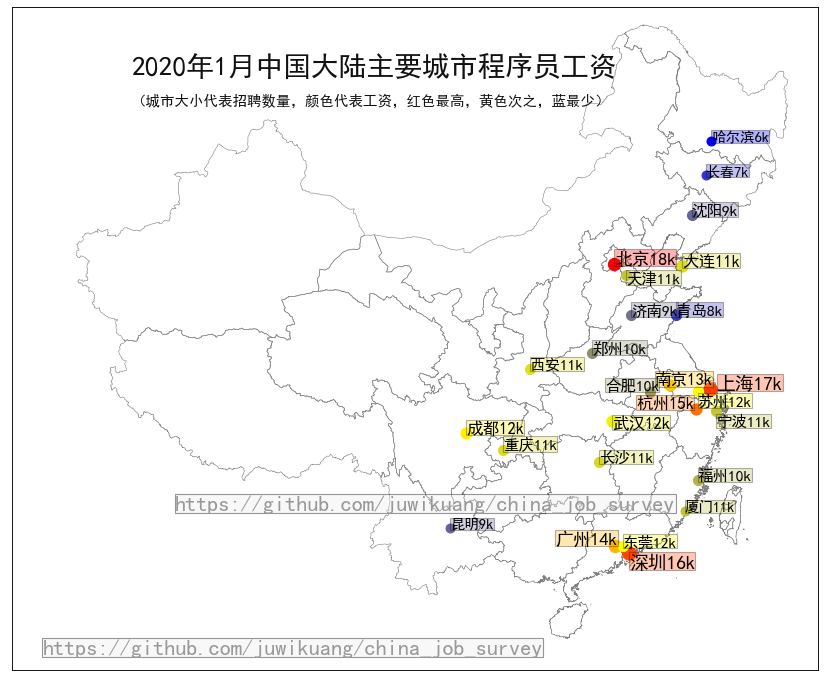

In [12]:
draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [13]:
data_blockchain=get_sub_stats_by_col(data[(data.expert_blockchain==1)],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
17,天津,25000,25000,25000,25000,1,0.15%
4,上海,24741,11500,24583,45833,58,8.83%
3,深圳,21902,5425,20000,52528,138,21.00%
6,北京,21564,4833,17500,60000,73,11.11%
15,厦门,20000,17500,20000,32500,6,0.91%
11,郑州,18643,9000,18643,22500,7,1.07%
1,广州,18593,4600,15000,32500,220,33.49%
5,杭州,17526,2500,19250,29694,42,6.39%
9,南京,17292,12500,15938,37500,12,1.83%
10,大连,16800,9500,15500,30000,5,0.76%


In [14]:
describe(data_blockchain,'区块链工程师')

2020年1月天津招收区块链工程师1人。2019年1月天津区块链工程师平均工资25000元，工资中位数25000元，其中95%的人的工资介于25000元到25000元。

2020年1月上海招收区块链工程师58人。2019年1月上海区块链工程师平均工资24741元，工资中位数24583元，其中95%的人的工资介于11500元到45833元。

2020年1月深圳招收区块链工程师138人。2019年1月深圳区块链工程师平均工资21902元，工资中位数20000元，其中95%的人的工资介于5425元到52528元。

2020年1月北京招收区块链工程师73人。2019年1月北京区块链工程师平均工资21564元，工资中位数17500元，其中95%的人的工资介于4833元到60000元。

2020年1月厦门招收区块链工程师6人。2019年1月厦门区块链工程师平均工资20000元，工资中位数20000元，其中95%的人的工资介于17500元到32500元。

2020年1月郑州招收区块链工程师7人。2019年1月郑州区块链工程师平均工资18643元，工资中位数18643元，其中95%的人的工资介于9000元到22500元。

2020年1月广州招收区块链工程师220人。2019年1月广州区块链工程师平均工资18593元，工资中位数15000元，其中95%的人的工资介于4600元到32500元。

2020年1月杭州招收区块链工程师42人。2019年1月杭州区块链工程师平均工资17526元，工资中位数19250元，其中95%的人的工资介于2500元到29694元。

2020年1月南京招收区块链工程师12人。2019年1月南京区块链工程师平均工资17292元，工资中位数15938元，其中95%的人的工资介于12500元到37500元。

2020年1月大连招收区块链工程师5人。2019年1月大连区块链工程师平均工资16800元，工资中位数15500元，其中95%的人的工资介于9500元到30000元。

2020年1月宁波招收区块链工程师2人。2019年1月宁波区块链工程师平均工资16166元，工资中位数16166元，其中95%的人的工资介于11500元到20833元。

2020年1月西安招收区块链工程师4人。2019年1月西安区块链工程师平均工资14250元，工资中位数1

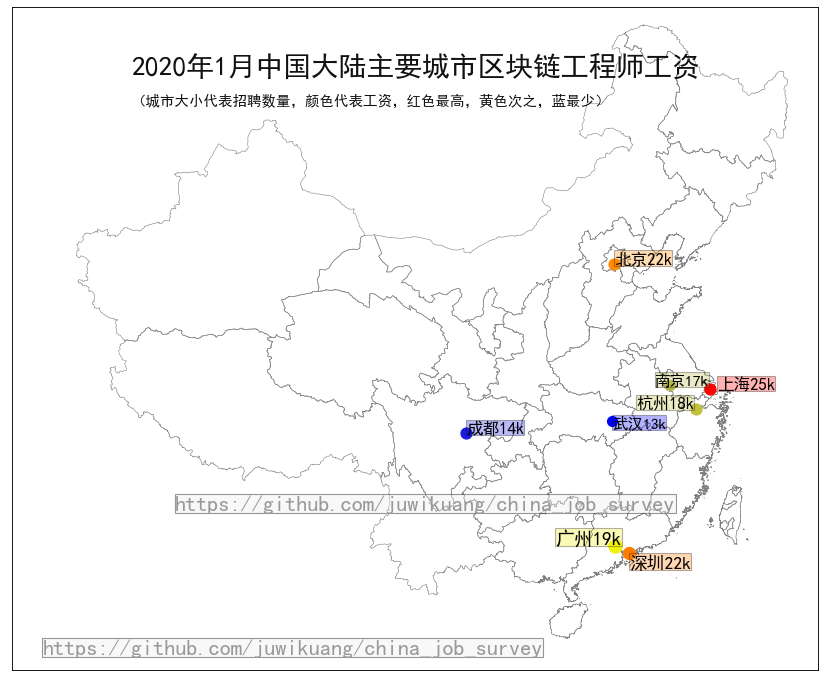

In [15]:
draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 算法工程师

In [16]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,北京,22826,5000,20833,50000,2966,13.87%
0,上海,21861,5813,20000,45000,4213,19.71%
4,深圳,20666,5500,18000,45000,3666,17.15%
7,杭州,18750,3750,17500,45000,1328,6.21%
2,广州,18490,6000,17000,40000,2173,10.17%
16,南京,16996,4500,15000,35000,1158,5.42%
13,苏州,16254,5991,15000,30453,871,4.07%
17,合肥,15395,7000,13625,38507,231,1.08%
9,武汉,15047,4000,15000,27687,1142,5.34%
20,大连,14691,3027,12500,30000,99,0.46%


In [17]:
describe(data_city_algorithm,'算法工程师')

2020年1月北京招收算法工程师2966人。2019年1月北京算法工程师平均工资22826元，工资中位数20833元，其中95%的人的工资介于5000元到50000元。

2020年1月上海招收算法工程师4213人。2019年1月上海算法工程师平均工资21861元，工资中位数20000元，其中95%的人的工资介于5813元到45000元。

2020年1月深圳招收算法工程师3666人。2019年1月深圳算法工程师平均工资20666元，工资中位数18000元，其中95%的人的工资介于5500元到45000元。

2020年1月杭州招收算法工程师1328人。2019年1月杭州算法工程师平均工资18750元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2020年1月广州招收算法工程师2173人。2019年1月广州算法工程师平均工资18490元，工资中位数17000元，其中95%的人的工资介于6000元到40000元。

2020年1月南京招收算法工程师1158人。2019年1月南京算法工程师平均工资16996元，工资中位数15000元，其中95%的人的工资介于4500元到35000元。

2020年1月苏州招收算法工程师871人。2019年1月苏州算法工程师平均工资16254元，工资中位数15000元，其中95%的人的工资介于5991元到30453元。

2020年1月合肥招收算法工程师231人。2019年1月合肥算法工程师平均工资15395元，工资中位数13625元，其中95%的人的工资介于7000元到38507元。

2020年1月武汉招收算法工程师1142人。2019年1月武汉算法工程师平均工资15047元，工资中位数15000元，其中95%的人的工资介于4000元到27687元。

2020年1月大连招收算法工程师99人。2019年1月大连算法工程师平均工资14691元，工资中位数12500元，其中95%的人的工资介于3027元到30000元。

2020年1月成都招收算法工程师908人。2019年1月成都算法工程师平均工资14518元，工资中位数12500元，其中95%的人的工资介于4240元到31317元。

2020年1月天津招收算法工程师152人。2019年1月天津算法工程师平均工资14189元，工资中位数12500元，其

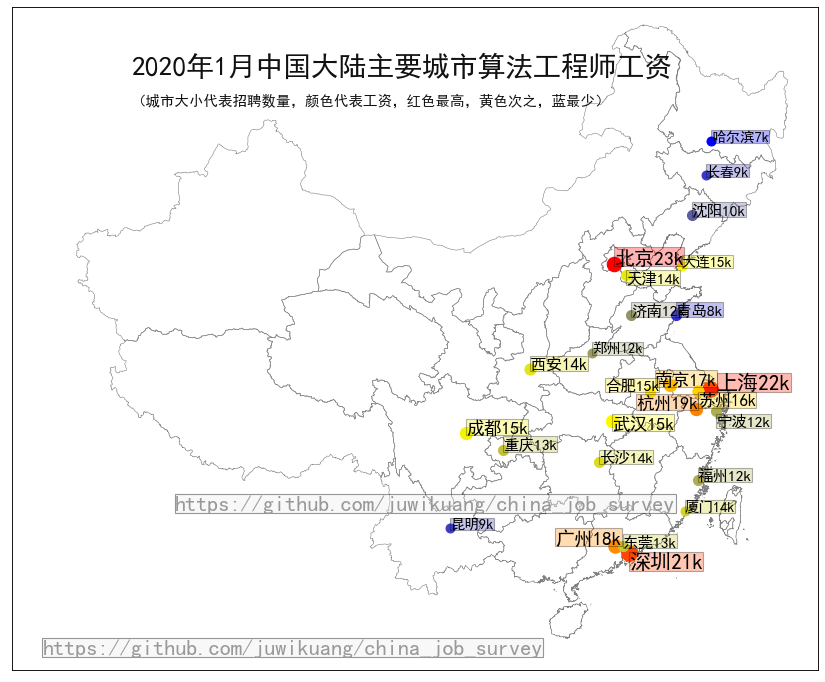

In [18]:
draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市算法工程师工资')

# 系统架构师

In [19]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
6,北京,31248,10156,30000,55000,1145,14.37%
5,杭州,27495,9444,25000,45000,460,5.77%
11,深圳,26154,8708,25000,51708,1095,13.74%
4,上海,23909,7000,22500,50000,1568,19.67%
3,广州,21120,5225,20000,45000,1253,15.72%
2,南京,20439,5100,20000,38167,348,4.37%
9,成都,19134,7450,17900,43083,312,3.91%
13,东莞,17088,7000,17500,28437,69,0.87%
1,武汉,16842,6262,16333,30000,441,5.53%
12,长沙,16791,9207,15000,31164,149,1.87%


In [20]:
describe(data_city_architect,'系统架构师')

2020年1月北京招收系统架构师1145人。2019年1月北京系统架构师平均工资31248元，工资中位数30000元，其中95%的人的工资介于10156元到55000元。

2020年1月杭州招收系统架构师460人。2019年1月杭州系统架构师平均工资27495元，工资中位数25000元，其中95%的人的工资介于9444元到45000元。

2020年1月深圳招收系统架构师1095人。2019年1月深圳系统架构师平均工资26154元，工资中位数25000元，其中95%的人的工资介于8708元到51708元。

2020年1月上海招收系统架构师1568人。2019年1月上海系统架构师平均工资23909元，工资中位数22500元，其中95%的人的工资介于7000元到50000元。

2020年1月广州招收系统架构师1253人。2019年1月广州系统架构师平均工资21120元，工资中位数20000元，其中95%的人的工资介于5225元到45000元。

2020年1月南京招收系统架构师348人。2019年1月南京系统架构师平均工资20439元，工资中位数20000元，其中95%的人的工资介于5100元到38167元。

2020年1月成都招收系统架构师312人。2019年1月成都系统架构师平均工资19134元，工资中位数17900元，其中95%的人的工资介于7450元到43083元。

2020年1月东莞招收系统架构师69人。2019年1月东莞系统架构师平均工资17088元，工资中位数17500元，其中95%的人的工资介于7000元到28437元。

2020年1月武汉招收系统架构师441人。2019年1月武汉系统架构师平均工资16842元，工资中位数16333元，其中95%的人的工资介于6262元到30000元。

2020年1月长沙招收系统架构师149人。2019年1月长沙系统架构师平均工资16791元，工资中位数15000元，其中95%的人的工资介于9207元到31164元。

2020年1月宁波招收系统架构师57人。2019年1月宁波系统架构师平均工资16735元，工资中位数16125元，其中95%的人的工资介于5790元到32562元。

2020年1月西安招收系统架构师197人。2019年1月西安系统架构师平均工资16601元，工资中位数17500元，其中95

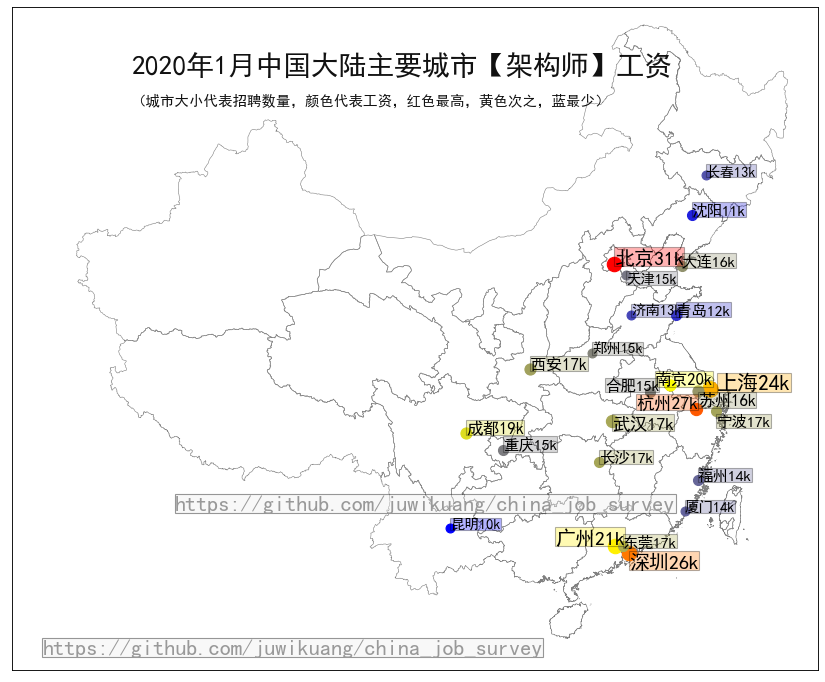

In [21]:
draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [22]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,宁波,16000,16000,16000,16000,1,3.03%
0,北京,14286,12500,14167,15000,7,21.21%
3,苏州,12500,12500,12500,12500,1,3.03%
1,广州,12100,7000,13125,15000,10,30.30%
6,上海,9800,8000,9800,12500,5,15.15%
4,武汉,9000,9000,9000,9000,1,3.03%
7,南京,9000,9000,9000,9000,3,9.09%
2,深圳,7500,7500,7500,7500,5,15.15%


In [23]:
describe(data_bio,'生物信息工程师')

2020年1月宁波招收生物信息工程师1人。2019年1月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年1月北京招收生物信息工程师7人。2019年1月北京生物信息工程师平均工资14286元，工资中位数14167元，其中95%的人的工资介于12500元到15000元。

2020年1月苏州招收生物信息工程师1人。2019年1月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年1月广州招收生物信息工程师10人。2019年1月广州生物信息工程师平均工资12100元，工资中位数13125元，其中95%的人的工资介于7000元到15000元。

2020年1月上海招收生物信息工程师5人。2019年1月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2020年1月武汉招收生物信息工程师1人。2019年1月武汉生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2020年1月南京招收生物信息工程师3人。2019年1月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2020年1月深圳招收生物信息工程师5人。2019年1月深圳生物信息工程师平均工资7500元，工资中位数7500元，其中95%的人的工资介于7500元到7500元。



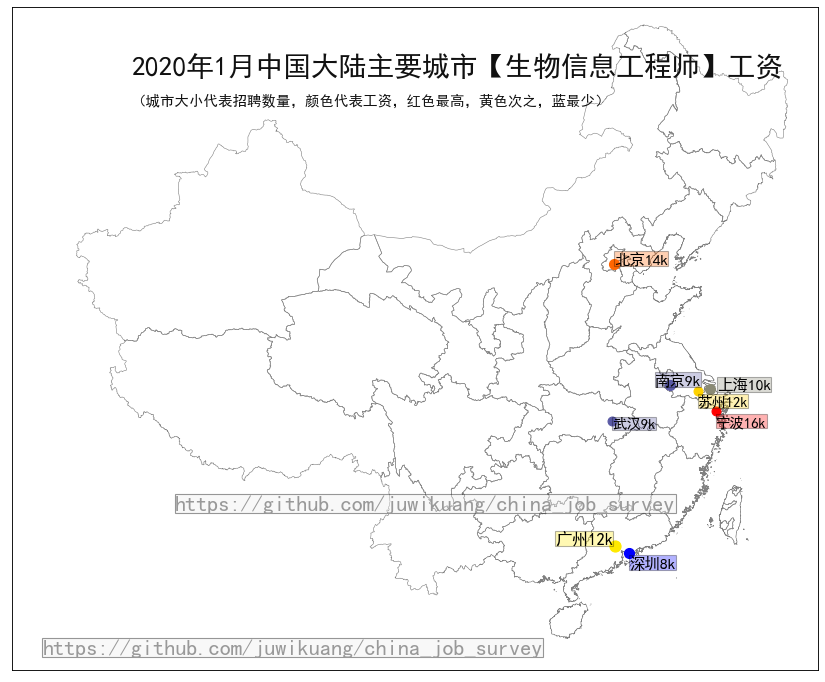

In [24]:
draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [25]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
8,北京,16135,9250,17500,34250,26,8.39%
4,上海,13552,4088,12500,33312,58,18.71%
0,武汉,12833,7000,12167,20000,12,3.87%
3,深圳,11420,5250,11000,21300,44,14.19%
1,广州,10256,1750,11500,16925,43,13.87%
5,长沙,9429,7000,9312,12500,14,4.52%
7,成都,7316,6000,6250,15025,38,12.26%
16,合肥,6944,6000,7000,7000,18,5.81%
15,西安,6500,5250,6250,9000,14,4.52%


In [26]:
describe(data_spider, '爬虫工程师')

2020年1月北京招收爬虫工程师26人。2019年1月北京爬虫工程师平均工资16135元，工资中位数17500元，其中95%的人的工资介于9250元到34250元。

2020年1月上海招收爬虫工程师58人。2019年1月上海爬虫工程师平均工资13552元，工资中位数12500元，其中95%的人的工资介于4088元到33312元。

2020年1月武汉招收爬虫工程师12人。2019年1月武汉爬虫工程师平均工资12833元，工资中位数12167元，其中95%的人的工资介于7000元到20000元。

2020年1月深圳招收爬虫工程师44人。2019年1月深圳爬虫工程师平均工资11420元，工资中位数11000元，其中95%的人的工资介于5250元到21300元。

2020年1月广州招收爬虫工程师43人。2019年1月广州爬虫工程师平均工资10256元，工资中位数11500元，其中95%的人的工资介于1750元到16925元。

2020年1月长沙招收爬虫工程师14人。2019年1月长沙爬虫工程师平均工资9429元，工资中位数9312元，其中95%的人的工资介于7000元到12500元。

2020年1月成都招收爬虫工程师38人。2019年1月成都爬虫工程师平均工资7316元，工资中位数6250元，其中95%的人的工资介于6000元到15025元。

2020年1月合肥招收爬虫工程师18人。2019年1月合肥爬虫工程师平均工资6944元，工资中位数7000元，其中95%的人的工资介于6000元到7000元。

2020年1月西安招收爬虫工程师14人。2019年1月西安爬虫工程师平均工资6500元，工资中位数6250元，其中95%的人的工资介于5250元到9000元。



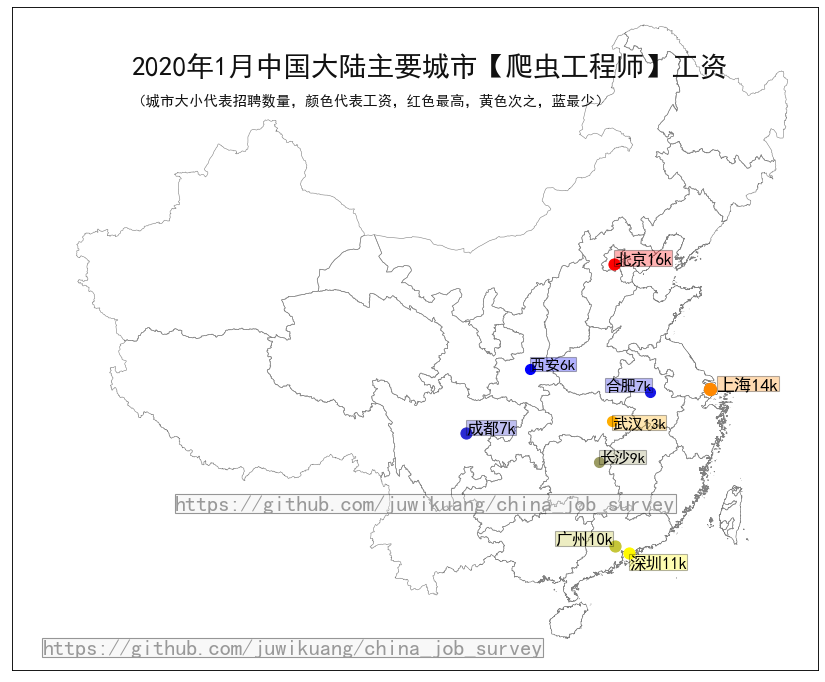

In [27]:
draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [28]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
2,北京,17225,3750,15000,41666,10959,10.43%
0,深圳,16577,7000,15000,35000,13439,12.79%
4,上海,16482,5250,15000,35000,17142,16.31%
11,杭州,15554,3750,13643,35000,5470,5.20%
10,广州,13975,3750,12500,30000,12316,11.72%
7,南京,13025,4250,12500,27000,6850,6.52%
16,东莞,12636,5250,12500,22500,830,0.79%
3,大连,12221,2500,10000,30000,4846,4.61%
1,成都,11913,3750,11000,27500,4395,4.18%
9,苏州,11844,3863,11357,25000,2436,2.32%


In [29]:
describe(data_java, 'Java程序员')

2020年1月北京招收Java程序员10959人。2019年1月北京Java程序员平均工资17225元，工资中位数15000元，其中95%的人的工资介于3750元到41666元。

2020年1月深圳招收Java程序员13439人。2019年1月深圳Java程序员平均工资16577元，工资中位数15000元，其中95%的人的工资介于7000元到35000元。

2020年1月上海招收Java程序员17142人。2019年1月上海Java程序员平均工资16482元，工资中位数15000元，其中95%的人的工资介于5250元到35000元。

2020年1月杭州招收Java程序员5470人。2019年1月杭州Java程序员平均工资15554元，工资中位数13643元，其中95%的人的工资介于3750元到35000元。

2020年1月广州招收Java程序员12316人。2019年1月广州Java程序员平均工资13975元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2020年1月南京招收Java程序员6850人。2019年1月南京Java程序员平均工资13025元，工资中位数12500元，其中95%的人的工资介于4250元到27000元。

2020年1月东莞招收Java程序员830人。2019年1月东莞Java程序员平均工资12636元，工资中位数12500元，其中95%的人的工资介于5250元到22500元。

2020年1月大连招收Java程序员4846人。2019年1月大连Java程序员平均工资12221元，工资中位数10000元，其中95%的人的工资介于2500元到30000元。

2020年1月成都招收Java程序员4395人。2019年1月成都Java程序员平均工资11913元，工资中位数11000元，其中95%的人的工资介于3750元到27500元。

2020年1月苏州招收Java程序员2436人。2019年1月苏州Java程序员平均工资11844元，工资中位数11357元，其中95%的人的工资介于3863元到25000元。

2020年1月武汉招收Java程序员5433人。2019年1月武汉Java程序员平均工资11638元，工资中位数10500元，其中95%的人的工资介于5000元到26000元。

2020年1月

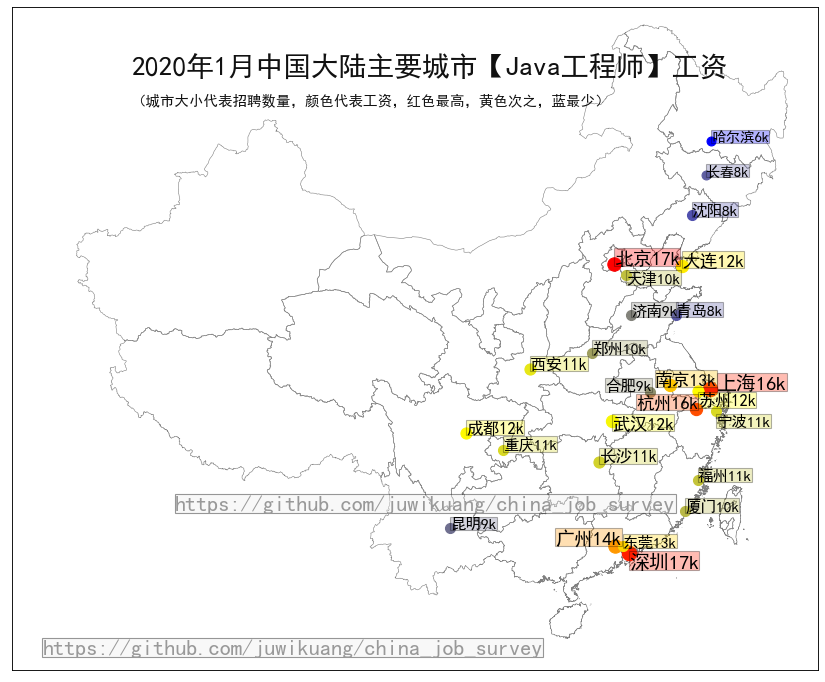

In [30]:
draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [31]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')

data_python.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,23879,4382,22500,58333,3948,14.71%
2,上海,20362,6500,18500,45000,5624,20.95%
5,深圳,20071,7000,17500,45000,3563,13.27%
4,杭州,18856,3750,17500,45000,1483,5.52%
1,广州,17200,4500,15000,39675,2679,9.98%
7,成都,14917,3597,12500,34946,1442,5.37%
15,西安,14898,3500,12971,35000,691,2.57%
6,南京,14848,3750,14000,31396,1813,6.75%
22,东莞,14718,1726,15000,30839,233,0.87%
9,武汉,14675,5000,12500,35000,1198,4.46%


In [32]:
describe(data_python, 'Python程序员')

2020年1月北京招收Python程序员3948人。2019年1月北京Python程序员平均工资23879元，工资中位数22500元，其中95%的人的工资介于4382元到58333元。

2020年1月上海招收Python程序员5624人。2019年1月上海Python程序员平均工资20362元，工资中位数18500元，其中95%的人的工资介于6500元到45000元。

2020年1月深圳招收Python程序员3563人。2019年1月深圳Python程序员平均工资20071元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年1月杭州招收Python程序员1483人。2019年1月杭州Python程序员平均工资18856元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2020年1月广州招收Python程序员2679人。2019年1月广州Python程序员平均工资17200元，工资中位数15000元，其中95%的人的工资介于4500元到39675元。

2020年1月成都招收Python程序员1442人。2019年1月成都Python程序员平均工资14917元，工资中位数12500元，其中95%的人的工资介于3597元到34946元。

2020年1月西安招收Python程序员691人。2019年1月西安Python程序员平均工资14898元，工资中位数12971元，其中95%的人的工资介于3500元到35000元。

2020年1月南京招收Python程序员1813人。2019年1月南京Python程序员平均工资14848元，工资中位数14000元，其中95%的人的工资介于3750元到31396元。

2020年1月东莞招收Python程序员233人。2019年1月东莞Python程序员平均工资14718元，工资中位数15000元，其中95%的人的工资介于1726元到30839元。

2020年1月武汉招收Python程序员1198人。2019年1月武汉Python程序员平均工资14675元，工资中位数12500元，其中95%的人的工资介于5000元到35000元。

2020年1月重庆招收Python程序员319人。2019年1月重庆Python程序员平均工资14512元，工资中位数125

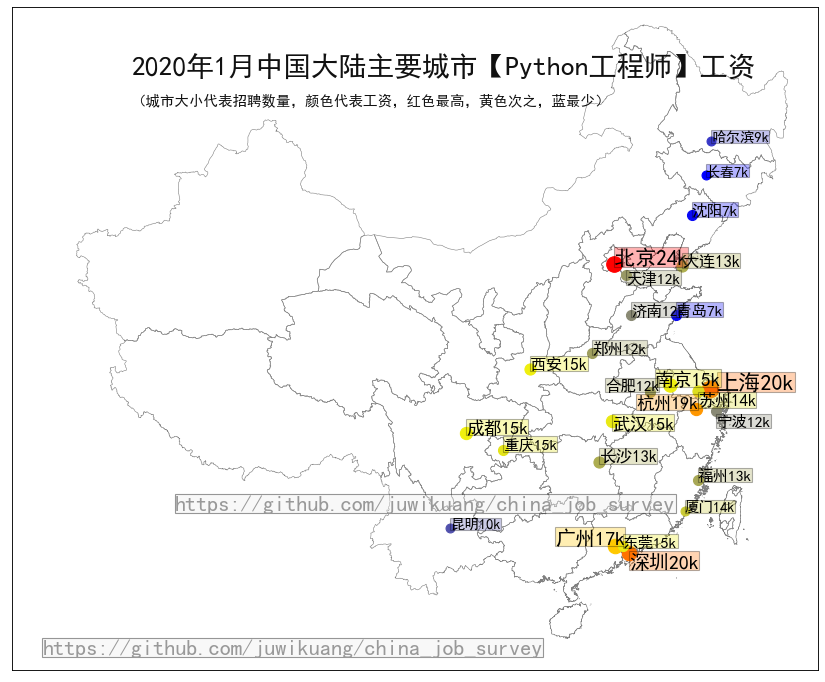

In [33]:
draw_city_map(data_python, 100,  f'{year}年{month}月中国大陆主要城市【Python工程师】工资')

In [34]:
history_data = pd.read_sql(sql='select * from CityStats', con=conn)

In [35]:
del history_data['Id']

In [36]:
history_data.head()

,Month,City,Salary
0,201906,哈尔滨,5983
1,201906,杭州,14707
2,201906,厦门,9789
3,201906,苏州,11197
4,201906,长沙,10852


In [37]:
data_hangzhou = history_data[history_data.City=='杭州']

In [38]:
del data_hangzhou['City']

In [39]:
import matplotlib.pyplot as plt

In [40]:
data_hangzhou.Salary.values

array([14707, 14980, 15106, 14980, 14758, 14921, 15050, 15375],
      dtype=int64)

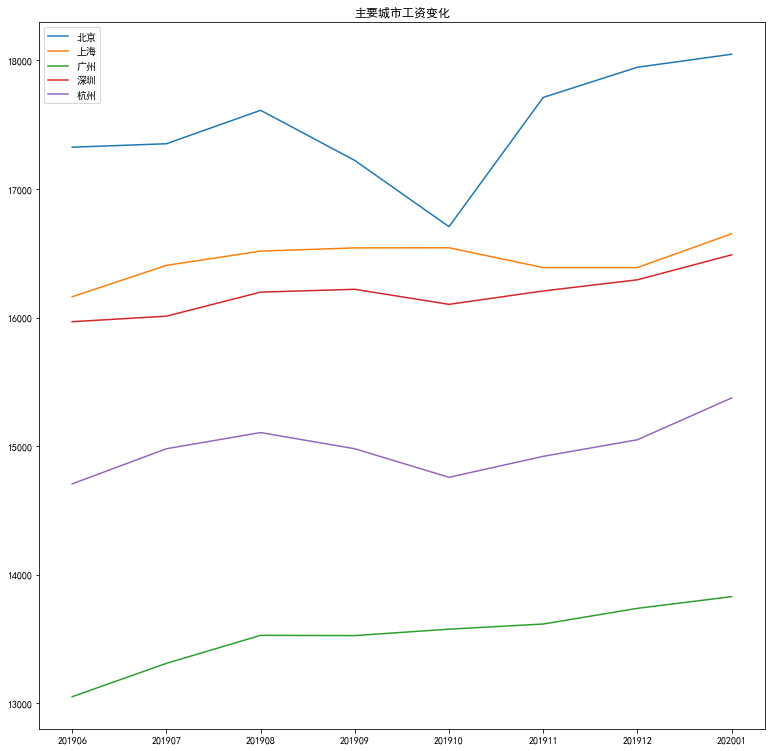

In [41]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
cities = set(history_data.City)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()